In [1]:
#import libraries required for analysis
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from ebmdatalab import bq
from ebmdatalab import charts
from ebmdatalab import maps

In [2]:
##first lets investigate ranitidine usage
sql = '''
SELECT
  month,
  practice,
  pct,
  bnf_name,
  bnf_code,
  SUM(items) AS total_items
FROM
  hscic.normalised_prescribing_standard
INNER JOIN
  hscic.practices pract
ON
  practice = pract.code
WHERE
  pract.setting = 4
  AND   
    bnf_code LIKE '0103010T0%' -- Ranitidine Hydrochloride
 AND
 month >= "2018-10-01"
GROUP BY
  practice,
  pct,
  month,
  bnf_name,
  bnf_code
ORDER BY
  practice,
  month
'''

df_ranit = bq.cached_read(sql, csv_path='ranit.csv')
df_ranit['month'] = df_ranit['month'].astype('datetime64[ns]')
df_ranit.head(3)

,month,practice,pct,bnf_name,bnf_code,total_items
0,2018-10-01,A81001,00K,Ranitidine HCl_Tab 150mg,0103010T0AAAAAA,32
1,2018-10-01,A81001,00K,Ranitidine HCl_Tab 300mg,0103010T0AAACAC,1
2,2018-11-01,A81001,00K,Ranitidine HCl_Tab 150mg,0103010T0AAAAAA,30


(0, 800000)

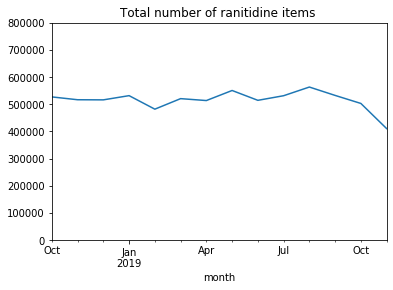

In [3]:
df_ranit.groupby("month")['total_items'].sum().plot(kind='line', title="Total number of ranitidine items ")
plt.ylim(0, 800000 )